# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = '12b2e5ff27404b2fa499ff90061b40ec'



In [11]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [12]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [13]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q='ethereum',
    language='en',
    sort_by='relevancy'
)


In [19]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in btc_headlines['articles']:
    try: 
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiments.append({
            'text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
        })
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)
btc.head

<bound method NDFrame.head of                                                  text  Compound  Positive  \
0   Even if you arent paying attention to Bitcoin ...    0.5859     0.124   
1   Netflix\r\n is making a docuseries about one o...   -0.7096     0.000   
2   Over the last five years, about 25,000 of thos...   -0.4939     0.000   
3   Even in cyberspace, the Department of Justice ...    0.7351     0.147   
4   The couple would never flee from the country a...   -0.3400     0.057   
5   If Sundays Super Bowl ads are any indication, ...    0.7783     0.163   
6   The news of one of the biggest money launderin...    0.5859     0.124   
7   The confiscation of the Bitcoin that remained ...    0.6486     0.146   
8   In one 2020 article for the magazine, she expl...   -0.2960     0.120   
9   If people who buy cryptocurrencies intended on...   -0.2023     0.039   
10  Feb 22 (Reuters) - Bitcoin miners are feeling ...   -0.1779     0.046   
11  March 1 (Reuters) - Bitcoin has leapt sinc

In [21]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

sentiments = []

for articles in eth_headlines['articles']:
    try: 
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiments.append({
            'text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth.head

<bound method NDFrame.head of                                                  text  Compound  Positive  \
0   If people who buy cryptocurrencies intended on...   -0.2023     0.039   
1   In February, shit hit the fan in the usual way...   -0.3182     0.059   
2   Technical analysis isnt a perfect tool, but it...   -0.2498     0.000   
3   This enables an L1 platform to bootstrap its n...    0.0000     0.000   
4   Coinbase reported that the share of trading vo...    0.6705     0.188   
5   People in Colorado will be able to pay their s...   -0.1027     0.000   
6   Illustration by James Bareham / The Verge\r\n\...   -0.4588     0.000   
7   It seems that in 2022, you cant escape from th...   -0.1326     0.000   
8   Last night, Twitter announced itll allow users...    0.2263     0.056   
9   Feb 7 (Reuters) - Polygon, a decentralized sca...    0.0000     0.000   
10  At over two hours long, the wildly popular new...   -0.1027     0.070   
11  The cryptocurrency boom over the past few 

In [22]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc.describe()

Compound   Positive   Negative    Neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.018150   0.067650   0.061100   0.871300
std     0.499463   0.054145   0.073714   0.071709
min    -0.757900   0.000000   0.000000   0.729000
25%    -0.307000   0.029250   0.000000   0.829500
50%    -0.064000   0.061500   0.023000   0.876000
75%     0.462600   0.121000   0.118500   0.923500
max     0.778300   0.163000   0.211000   1.000000

In [23]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth.describe()

Compound   Positive  Negative    Neutral
count  20.000000  20.000000  20.00000  20.000000
mean    0.139090   0.066750   0.02625   0.907000
std     0.391463   0.081887   0.03641   0.083709
min    -0.458800   0.000000   0.00000   0.723000
25%    -0.110175   0.000000   0.00000   0.846500
50%     0.000000   0.042500   0.00000   0.929000
75%     0.477750   0.123250   0.04775   0.973000
max     0.836900   0.234000   0.10500   1.000000

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk as nltk


In [40]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

stop = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('...')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [41]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
      # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))

    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]

   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    return tokens

In [42]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

text  Compound  Positive  \
0  Even if you arent paying attention to Bitcoin ...    0.5859     0.124   
1  Netflix\r\n is making a docuseries about one o...   -0.7096     0.000   
2  Over the last five years, about 25,000 of thos...   -0.4939     0.000   
3  Even in cyberspace, the Department of Justice ...    0.7351     0.147   
4  The couple would never flee from the country a...   -0.3400     0.057   

   Negative  Neutral                                             tokens  
0     0.000    0.876  [Even, if, you, arent, paying, attention, to, ...  
1     0.169    0.831  [Netflix, is, making, a, docuseries, about, on...  
2     0.091    0.909  [Over, the, last, five, year, about, 25,000, o...  
3     0.000    0.853  [Even, in, cyberspace, the, Department, of, Ju...  
4     0.118    0.825  [The, couple, would, never, flee, from, the, c...

In [43]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

text  Compound  Positive  \
0  If people who buy cryptocurrencies intended on...   -0.2023     0.039   
1  In February, shit hit the fan in the usual way...   -0.3182     0.059   
2  Technical analysis isnt a perfect tool, but it...   -0.2498     0.000   
3  This enables an L1 platform to bootstrap its n...    0.0000     0.000   
4  Coinbase reported that the share of trading vo...    0.6705     0.188   

   Negative  Neutral                                             tokens  
0     0.062    0.899  [If, people, who, buy, cryptocurrencies, inten...  
1     0.093    0.848  [In, February, shit, hit, the, fan, in, the, u...  
2     0.059    0.941  [Technical, analysis, isnt, a, perfect, tool, ...  
3     0.000    1.000  [This, enables, an, L1, platform, to, bootstra...  
4     0.000    0.812  [Coinbase, reported, that, the, share, of, tra...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [44]:
from collections import Counter
from nltk import ngrams

In [47]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('of', 'the'), 6),
 (('char', 'The'), 3),
 (('char', 'Feb'), 3),
 (('if', 'you'), 2),
 (('Bitcoin', 'and'), 2),
 (('and', 'other'), 2),
 (('other', 'cryptocurrencies'), 2),
 (('week', 'with'), 2),
 (('with', 'the'), 2),
 (('one', 'of'), 2),
 (('this', 'week'), 2),
 (('Mr.', 'Lichtensteins'), 2),
 (('Lichtensteins', 'wallet'), 2),
 (('at', 'the'), 2),
 (('char', 'If'), 2),
 (('in', 'bitcoin'), 2),
 (('bitcoin', 'and'), 2),
 (('people', 'who'), 2),
 (('Reuters', 'Bitcoin'), 2),
 (('since', 'Russia'), 2)]

In [48]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('of', 'the'), 6),
 (('of', 'this'), 4),
 (('trading', 'volume'), 2),
 (('and', 'other'), 2),
 (('in', 'cryptocurrency'), 2),
 (('More', 'than'), 2),
 (('than', '15'), 2),
 (('15', 'million'), 2),
 (('ha', 'been'), 2),
 (('been', 'donated'), 2),
 (('million', 'in'), 2),
 (('user', 'to'), 2),
 (('profile', 'picture'), 2),
 (('char', 'Feb'), 2),
 (('over', 'the'), 2),
 (('char', 'A'), 2),
 (('A', 'version'), 2),
 (('version', 'of'), 2),
 (('this', 'article'), 2),
 (('article', 'wa'), 2)]

In [49]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [50]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('the', 33),
 ('of', 20),
 ('char', 20),
 ('to', 19),
 ('a', 19),
 ('in', 18),
 ('and', 16),
 ('Bitcoin', 8),
 ('The', 7),
 ('that', 6)]

In [51]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('the', 30),
 ('char', 20),
 ('a', 19),
 ('to', 17),
 ('of', 16),
 ('in', 14),
 ('it', 11),
 ('and', 10),
 ('for', 9),
 ('ha', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

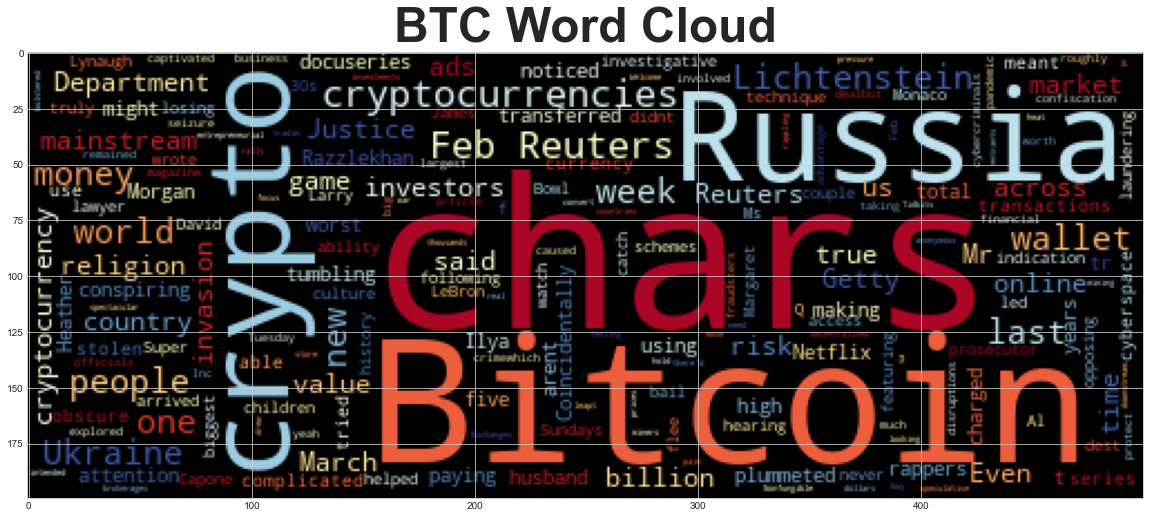

In [53]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap= 'RdYlBu').generate(text)
    plt.imshow(df_cloud)
    fontdict = {"fontsize": 48, "fontweight": "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(btc.text.str.cat(), title="BTC Word Cloud")

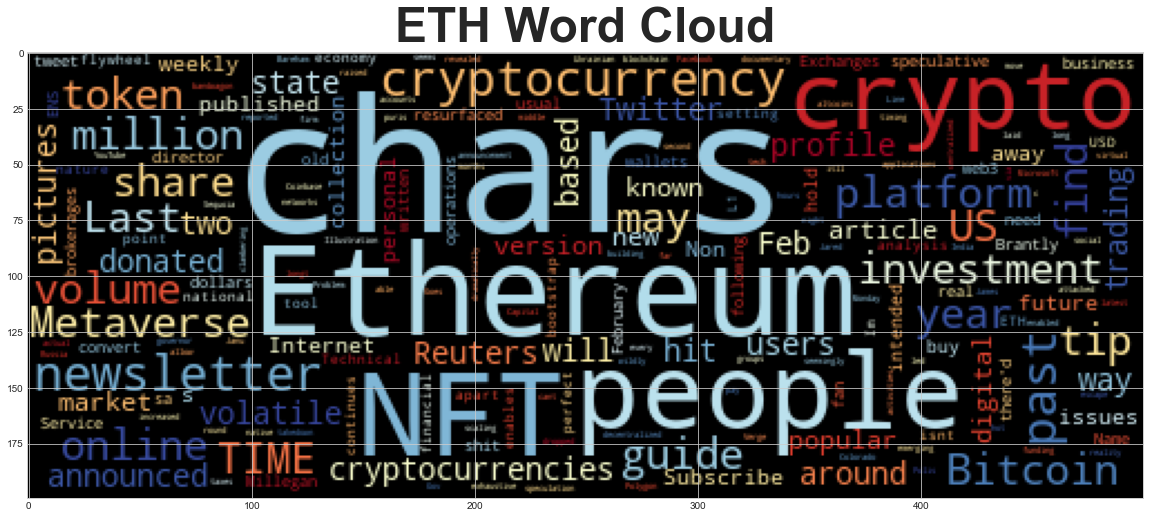

In [54]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth.text.str.cat(), title="ETH Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [56]:
import spacy
from spacy import displacy

In [57]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-03-05 21:17:11.028035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-05 21:17:11.028082: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [59]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [60]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc.text.str.cat()
all_btc_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]Over the last five years, about 25,000 of those Bitcoin were transferred out of Mr. Lichtensteins wallet using a complicated series of transactions meant to obscure that the currency had been stolen … [+2506 chars]Even in cyberspace, the Department of Justice is able to use a tried and true investigative technique, following the money, Ms. Monaco said. Its what led us to Al Capone in the 30s. It helped us dest… [+1176 chars]The couple would never flee from the country at the risk of losing access to their ability to have children, the lawyer wrote.\r\nAt the he

In [61]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "BTC NER"

In [62]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [63]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
one 2020 DATE
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDINAL
Reuters ORG
Russia GPE
Ukraine GPE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
YouTube ORG
Alex Castro PERSON
Verge ORG
BitConnect ORG
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
Bitcoin WORK_OF_ART
Bloombergs Lorcan Roche Kelly ORG
first ORDINAL
the 21st cen DATE
15 CARDINAL
Reuters ORG
Europe LOC
two CARDINAL
Russia GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
8 CARDINAL
Reuters ORG
2022 DATE
Feb 11 DATE
Reuters ORG
Fed

---

### Ethereum NER

In [64]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth.text.str.cat()
all_eth_text

'If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars]In February, shit hit the fan in the usual way: An old tweet resurfaced. Brantly Millegan, director of operations at Ethereum Name Service (ENS), a web3 business, had written the following in May 201… [+3096 chars]Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars]This enables an L1 platform to bootstrap its national economy over time through a flywheel between financial speculation around its native token and actual building of applications and activities in … [+4057 chars]Coinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped 

In [65]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(all_eth_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "ETH NER"

In [66]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [67]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Ethereum ORG
ETH-USD ORG
Crypto PERSON
last year DATE
Between 2020 and 2021 DATE
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
James Bareham PERSON
More than $15 million MONEY
More than $15 million MONEY
Ukrainian GPE
Russia GPE
2022 DATE
Facebook ORG
Microsoft ORG
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
7 CARDINAL
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
two hours TIME
YouTube ORG
Waka Flacka Fla ORG
the past few years DATE
NFT ORG
$23 billion MONEY
TIME ORG
weekly DATE
TIME ORG
weekly DATE
10 CARDINAL
Reuters ORG
Thursday DATE
UK GPE
today DATE
Brett Harrison PERSON
Bitcoin PERSON
2017 DATE
+5776 ORG
Finance Insider PERSON
American Express ORG
Twitter PRODUCT


---